# Mushroom Clasification
- - - 
[revisar](https://www.kaggle.com/code/raghuchaudhary/mushroom-classification/notebook#Poisonous-=-1)

__Descripcion:__

+ Attribute Information: (classes: edible=e, poisonous=p)

+ cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

+ cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

+ cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

+ bruises: bruises=t,no=f

+ odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

+ gill-attachment: attached=a,descending=d,free=f,notched=n

+ gill-spacing: close=c,crowded=w,distant=d

+ gill-size: broad=b,narrow=n

+ gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

+ stalk-shape: enlarging=e,tapering=t

+ stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

+ stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ veil-type: partial=p,universal=u

+ veil-color: brown=n,orange=o,white=w,yellow=y

+ ring-number: none=n,one=o,two=t

+ ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

+ spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

+ population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

+ habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA 
- - -

In [3]:
mushroom.shape

(8124, 23)

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Contamos con Variables categoricas unicamente

<AxesSubplot:>

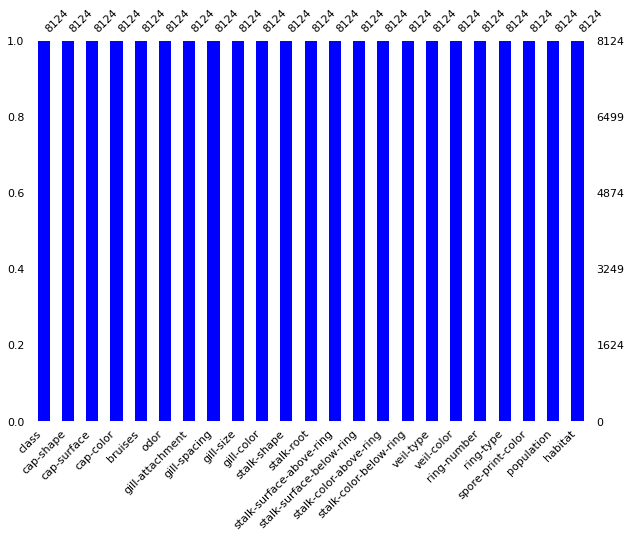

In [5]:
import missingno as msg

msg.bar(mushroom,color = 'blue',figsize=(10,7),fontsize = 11)

La base de Hongos no cuentan con ningun valor nulo dentro de el

**Descripcion de la base de datos**

In [6]:
mushroom.describe(include='object').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


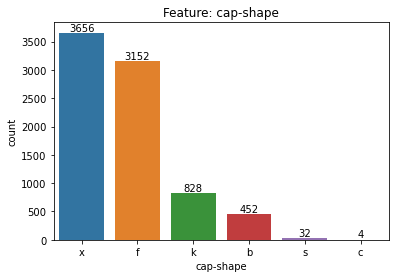

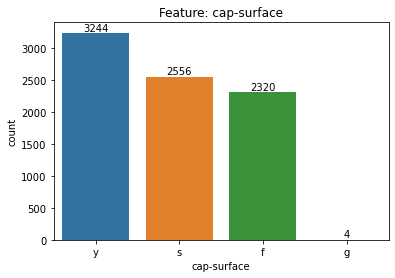

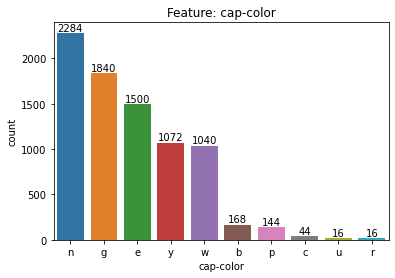

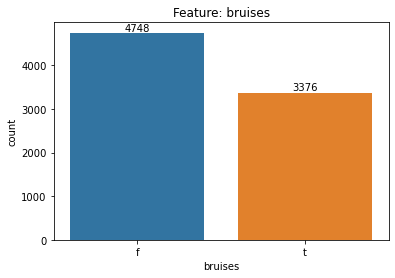

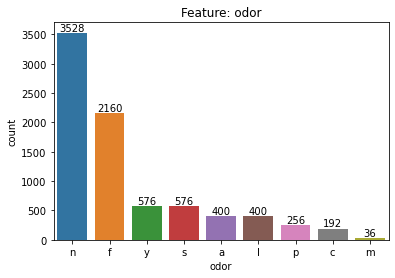

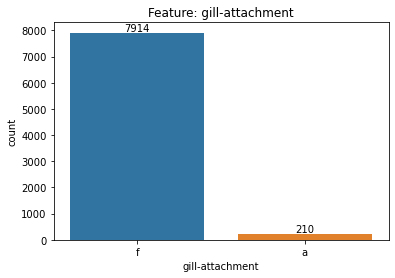

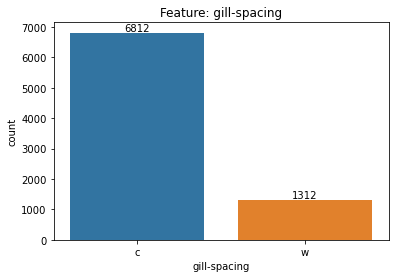

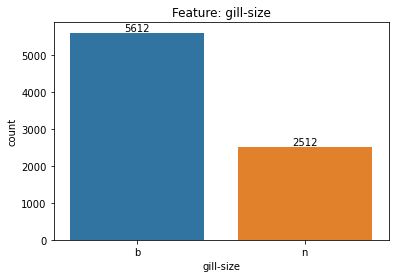

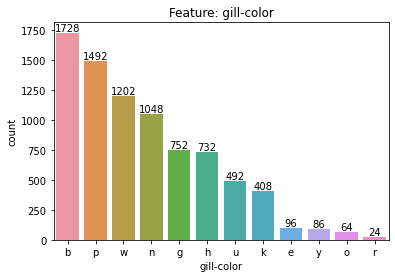

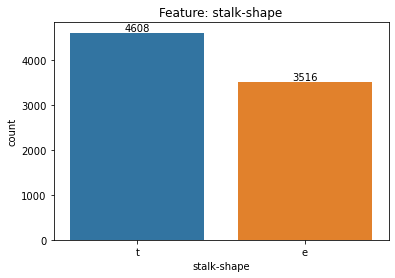

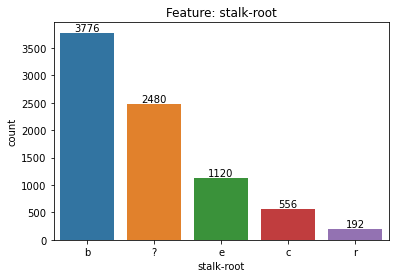

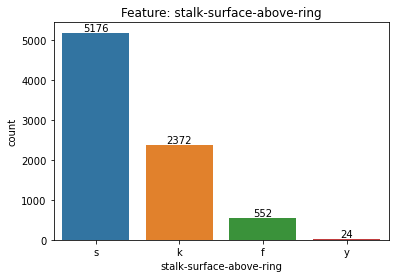

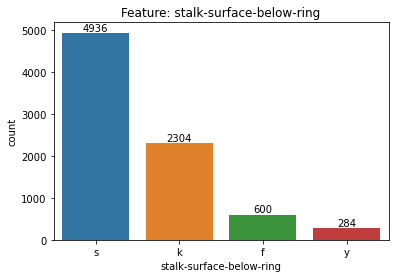

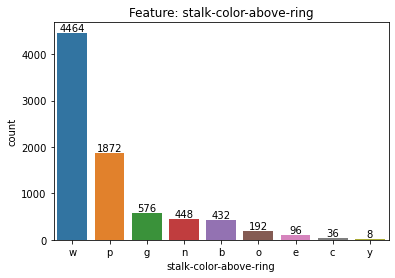

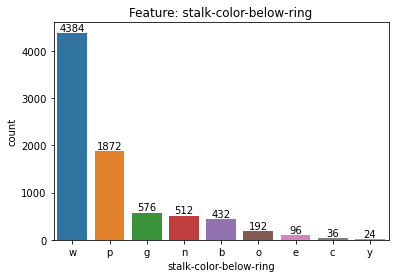

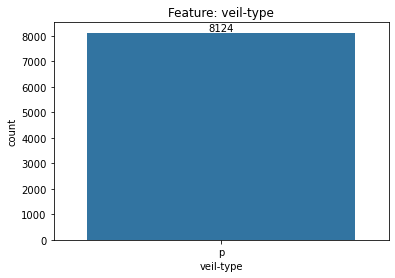

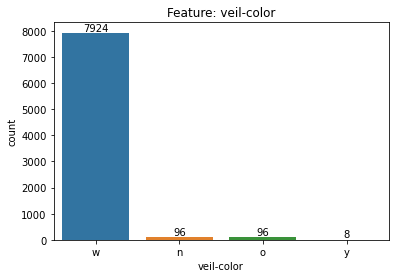

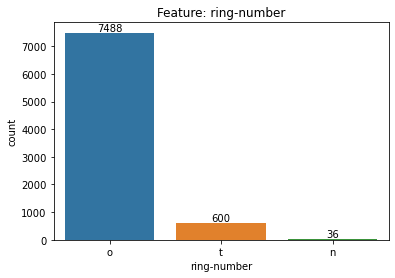

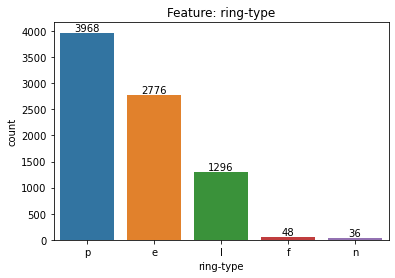

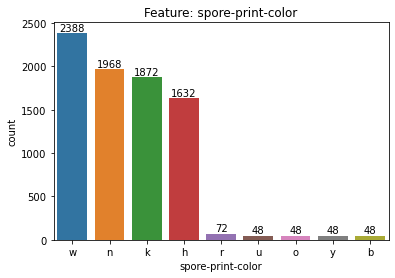

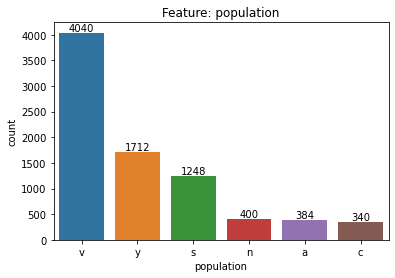

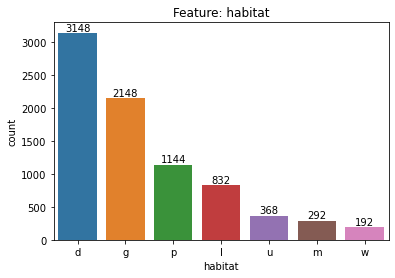

In [15]:
for features in mushroom.columns:
    if features!= 'class':
        import warnings
        warnings.filterwarnings('ignore')
        sns.countplot(mushroom[features],order = mushroom[features].value_counts().index).set_title('Feature: {}'.format(features))
        for index, value in enumerate(mushroom[features].value_counts().values):
            plt.text(index,value,str(value), ha = 'center', va= 'bottom')
        plt.show()

In [8]:
for i in mushroom.columns:
    print(i)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


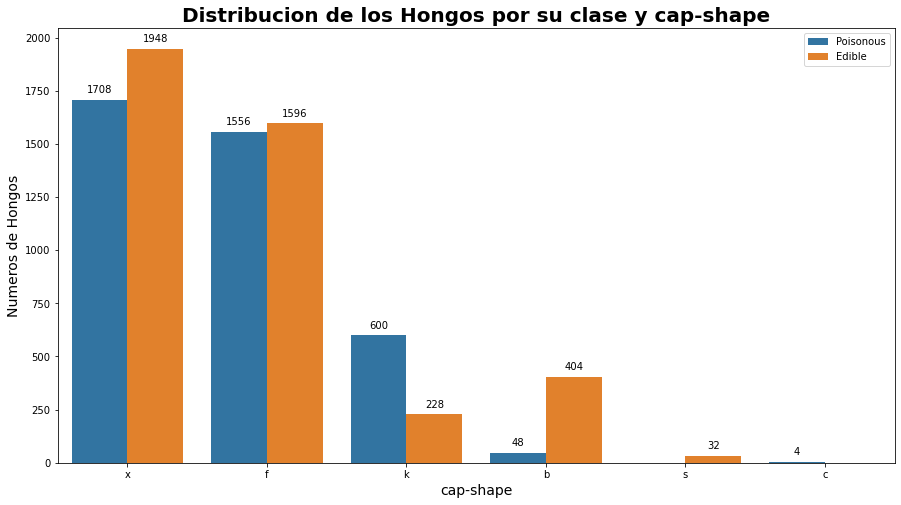

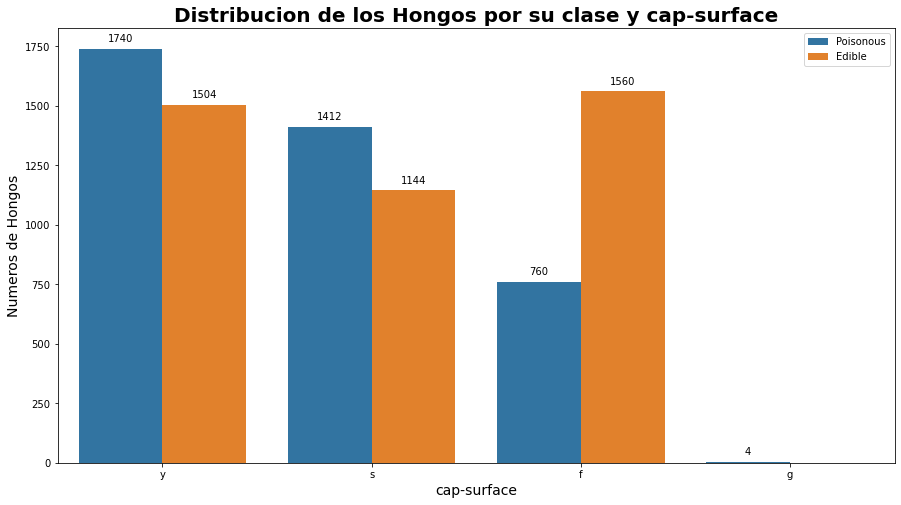

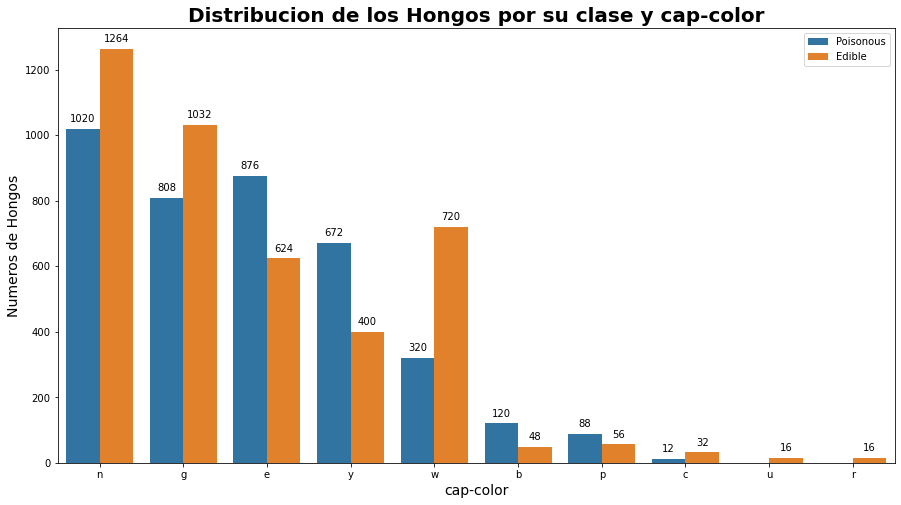

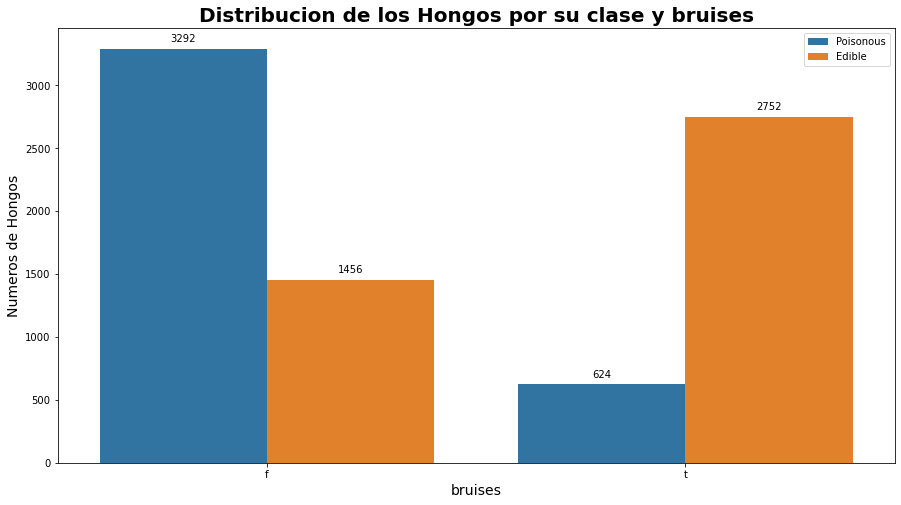

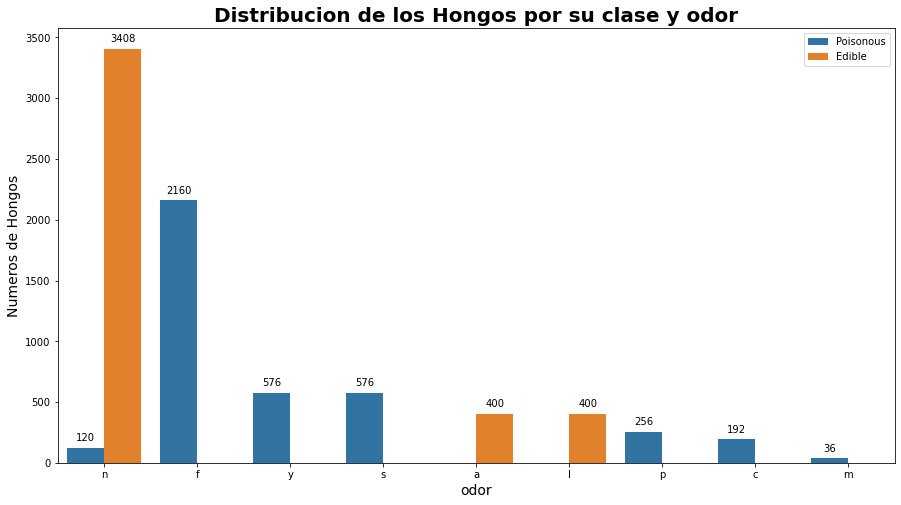

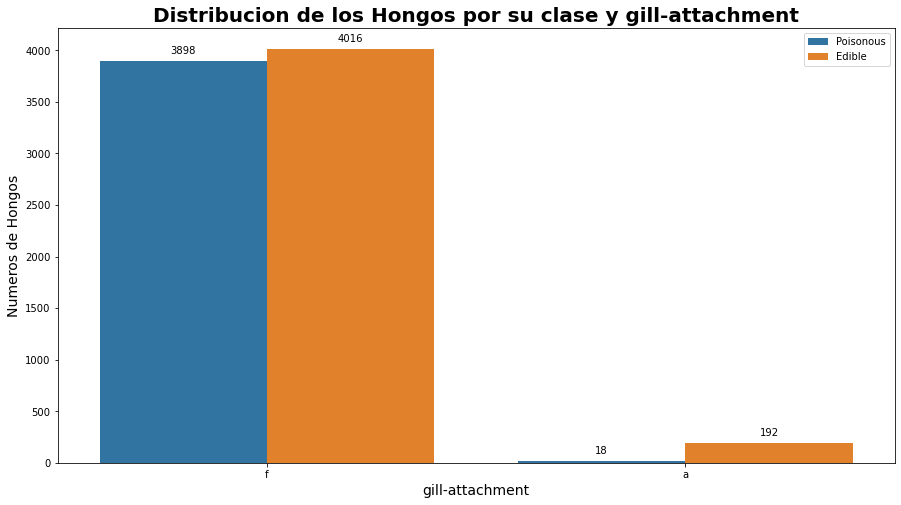

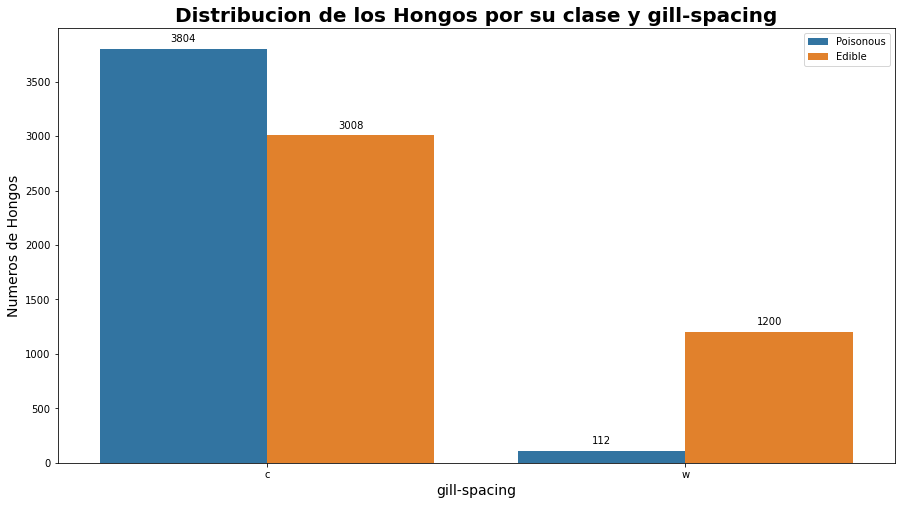

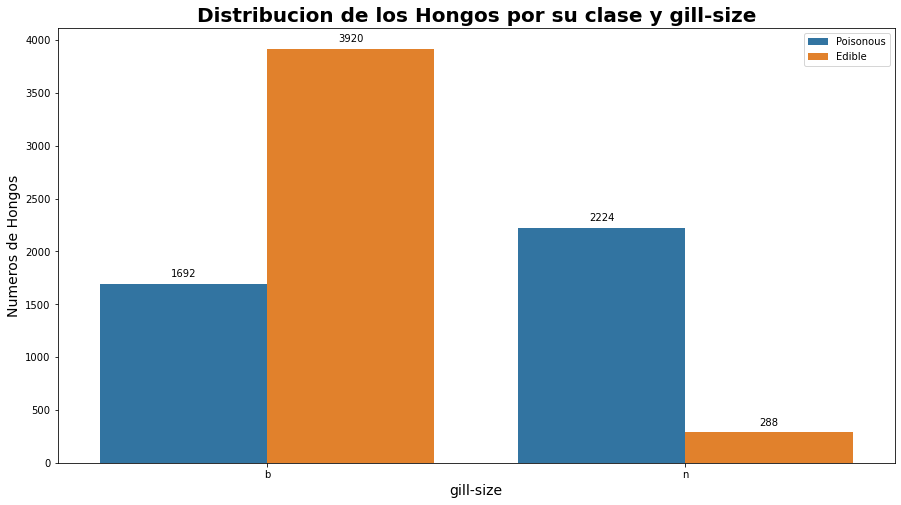

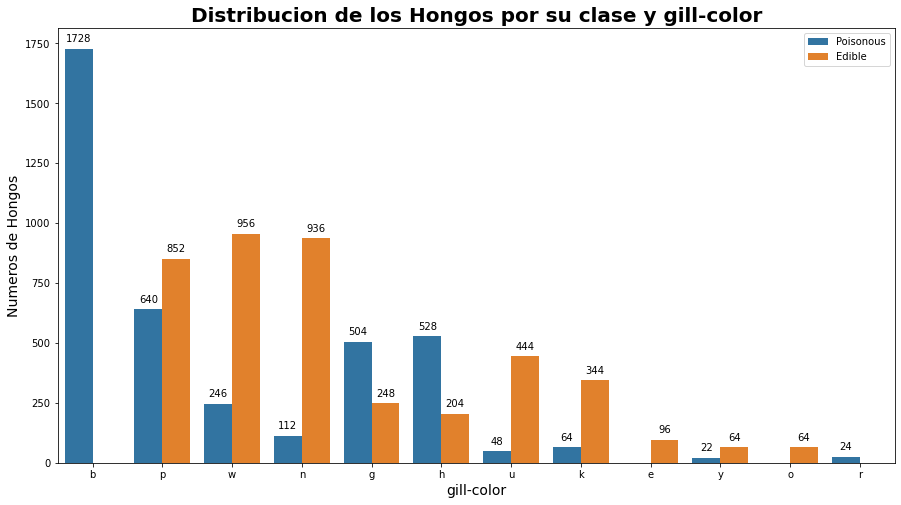

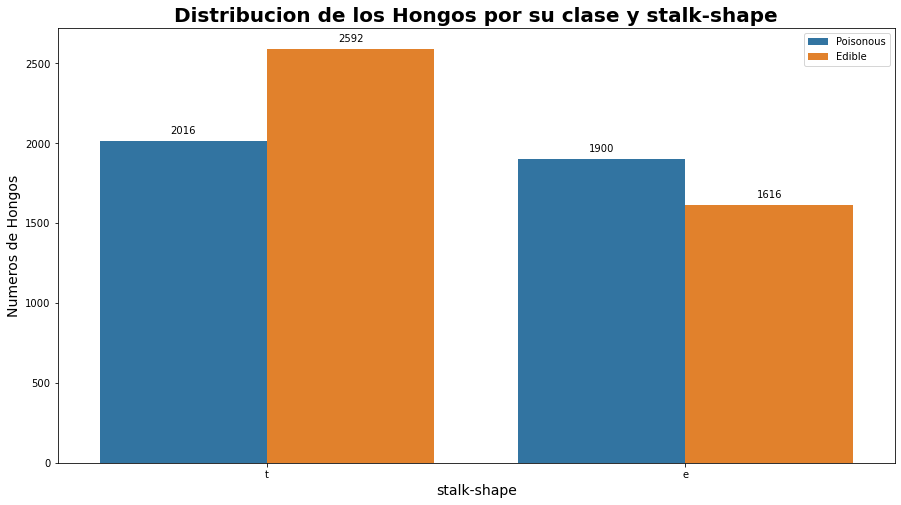

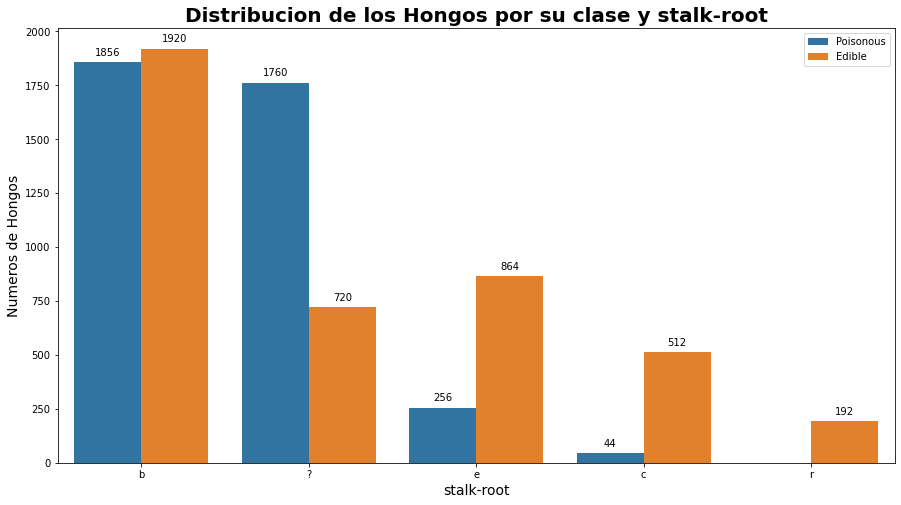

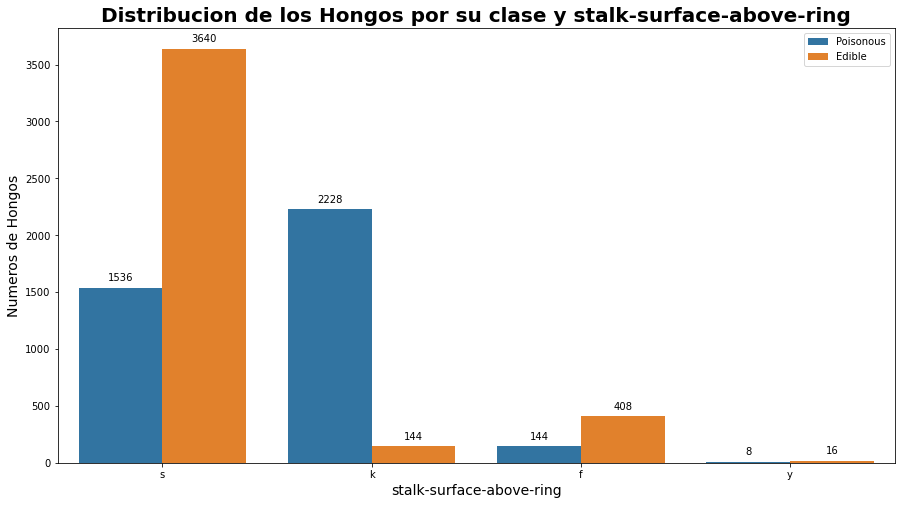

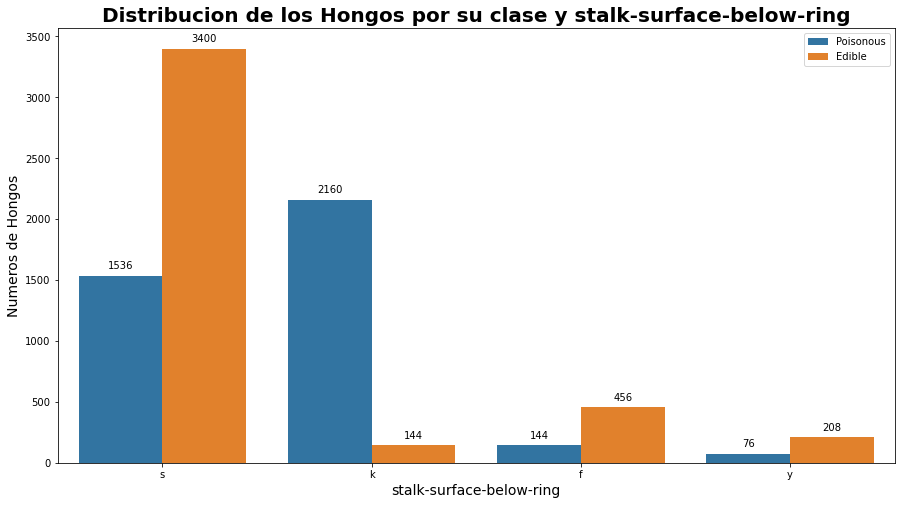

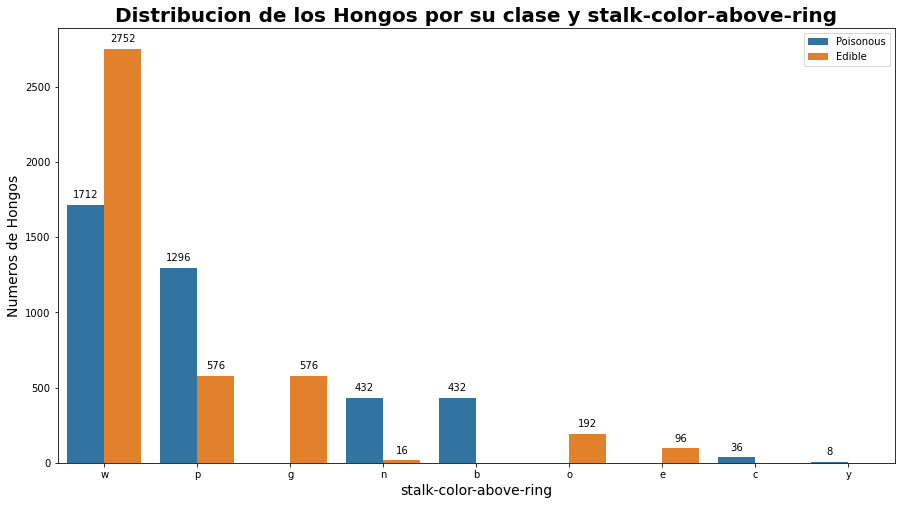

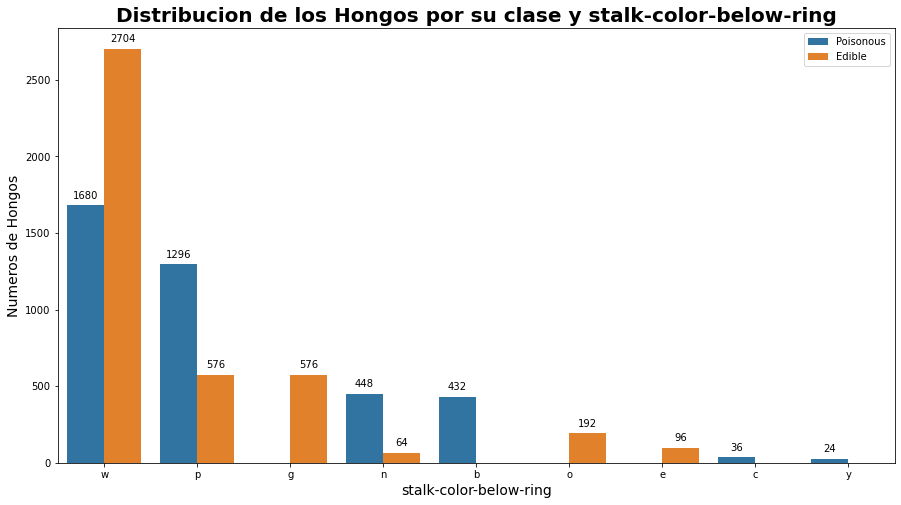

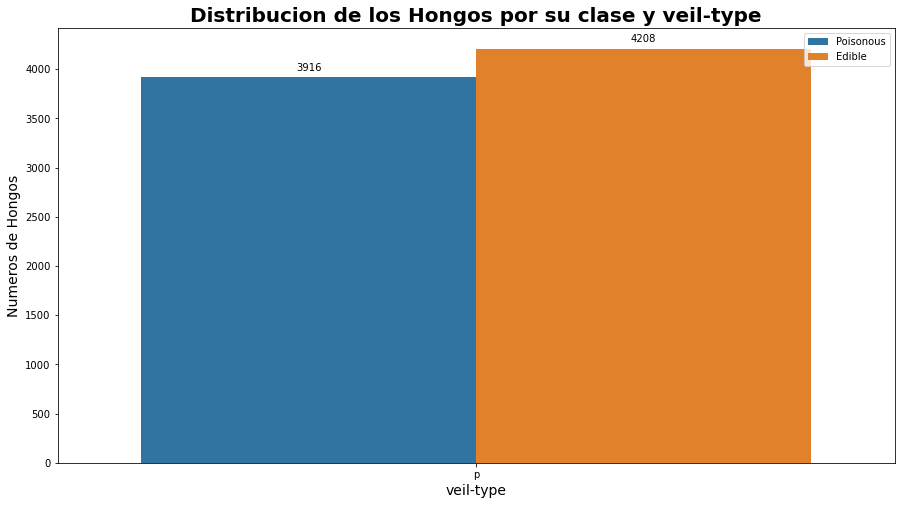

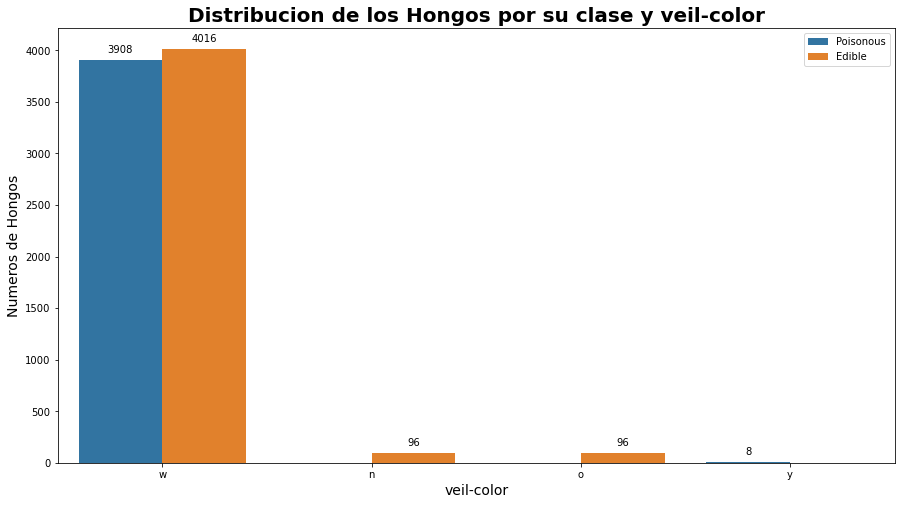

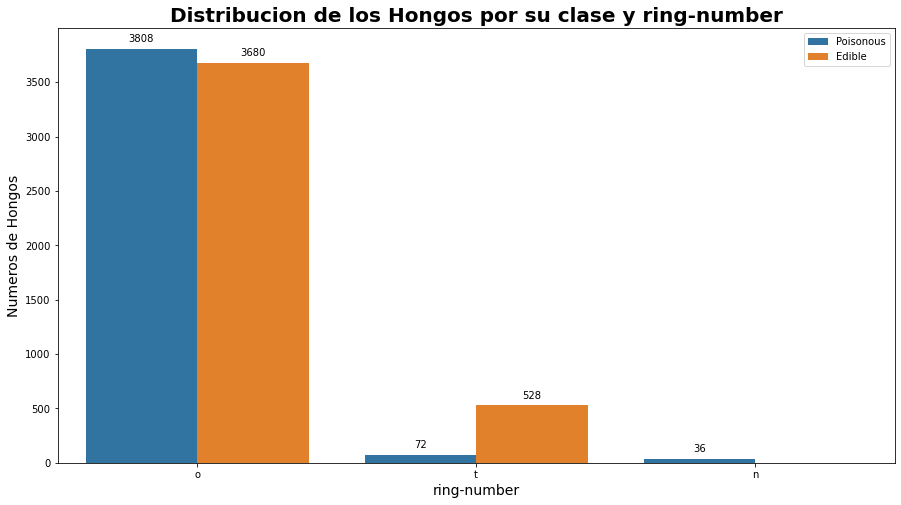

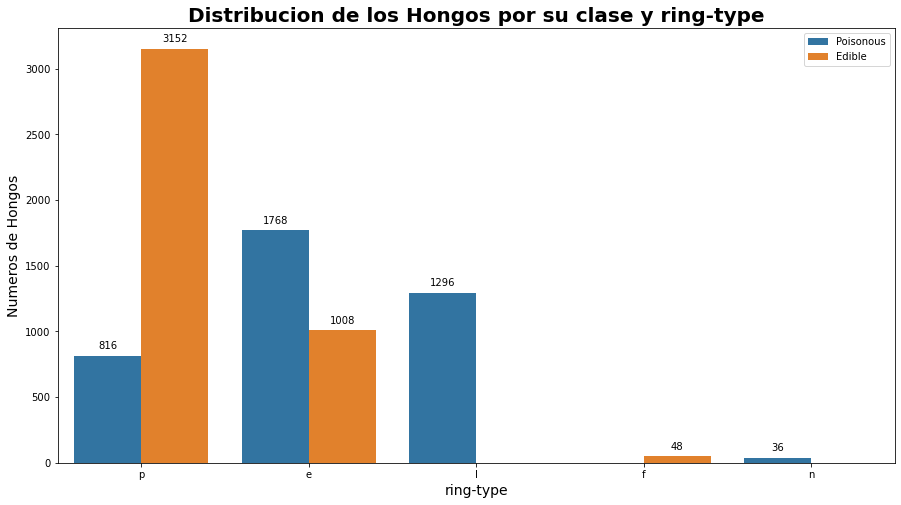

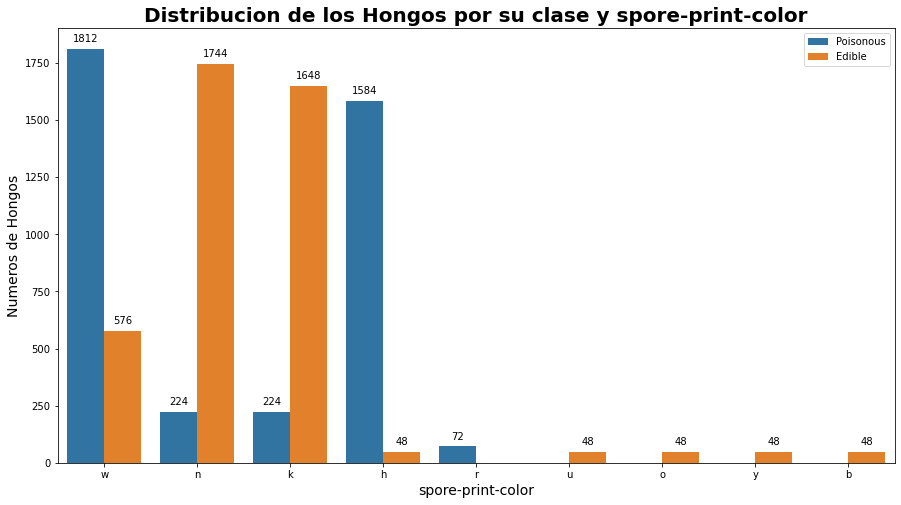

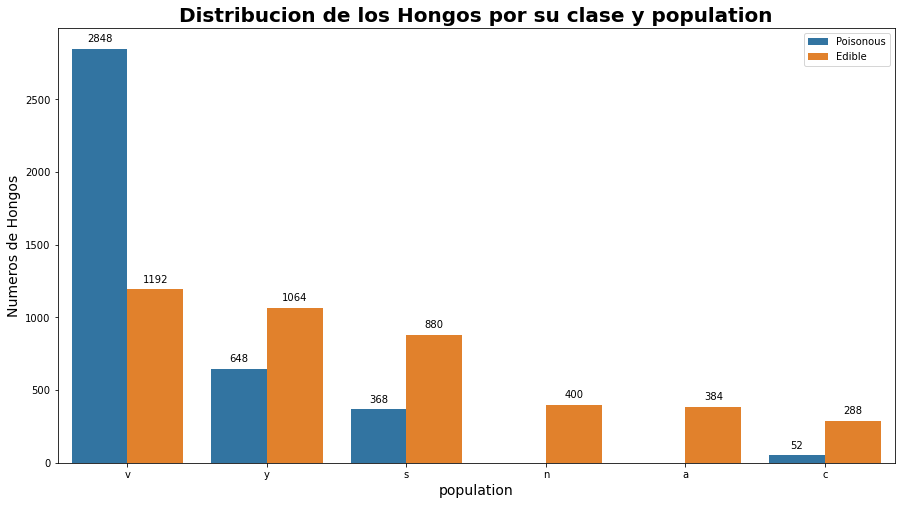

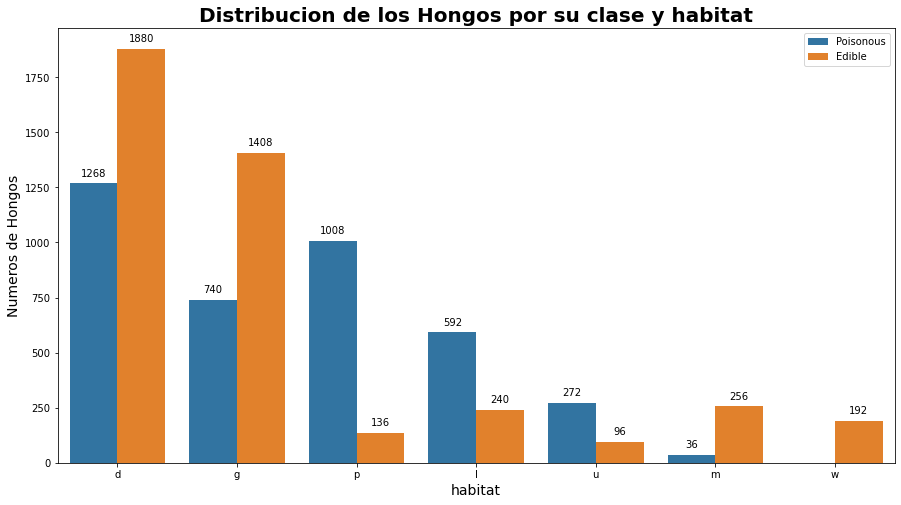

In [44]:
for columns in mushroom.columns:
    if columns != 'class':
        plt.figure(figsize=(15,8))
        multi_plot=sns.countplot(x = mushroom[columns],
                    hue = mushroom['class'],
                    order= mushroom[columns].value_counts().index)

        for p in multi_plot.patches:
            multi_plot.annotate(format(p.get_height(),'.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va = 'center',
            xytext = (0,10),
            textcoords = 'offset points'
            )
        plt.ylabel('Numeros de Hongos',fontsize=14)
        plt.xlabel(columns,fontsize=14)
        plt.legend(['Poisonous','Edible'],loc = 'upper right')
        plt.title('Distribucion de los Hongos por su clase y '+columns,fontsize =20,fontweight='bold')
        plt.show()


---